# Exploring the HeuristicEnv with nutrition constraints

In [1]:
from stable_baselines3 import PPO, DQN, A2C
from meal_planning_environment import HeuristicEnv
from meal_planning_environment import run_with_learning_algorithm, load_data

import os 
import time
from IPython.display import clear_output

2023-04-24 23:50:32.619091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load all meal, nutrition, and carbon data

In [2]:
possible_meals, meal_categories, nutrition_data, carbon_data = load_data()
clear_output()

## Initialize MealPlanningEnv
We can choose from any of the following environments:
1. MaxNutritionEnv
2. HeuristicEnv
3. GPTOnlyEnv
4. RLHFEnv

In this notebook we will expore the HeuristicEnv and design a meal-plan for one week (i.e., 21 meals).

In [3]:
num_meals = 21
heuristic_env = HeuristicEnv(
    possible_meals=possible_meals, 
    meal_categories=meal_categories, 
    nutrition_data=nutrition_data, 
    carbon_data=carbon_data, 
    num_meals=num_meals
)

We can define an objective function that uses an upper bound and lower bound for desireable nutrition across the nutrition categories.

In [4]:
heuristic_env.set_reward_weights(coef_nutrition_lower=1, coef_nutrition_upper=-0.5)

# MaxNutritionEnv with PPO vs. DQN vs. A2C

We'll compare each of our different learning algorithms for the chosen environment.

Output stored at: ./tmp/gym/20230424-235112_heuristic_env_PPO,{'coef_nutrition_lower'=1, 'coef_nutrition_upper'=-0.5, 'coef_sequence_entropy'=0, 'coef_repetitions'=0, 'coef_overall_entropy'=0, 'coef_carbon'=0},num_steps=500000
Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: Stir-fried oyster mushroom and onion
Chosen Meal Category: Stir-fried
Meal History: ['Steamed octopus with rice cake' 'S cheese stick'
 'Seasoned salad with konjac and kimchi'
 'Shrimp vegetable fried rice made with oyster sauce'
 'S royal-style tteokbokki (stir-fried rice cake)'
 'S spinach spread white bread pizza'
 'Freshwater snail soy paste soup (freshwater snail soup)'
 'Deep-fried brown kelp'
 'Udon (white wheat noodles) with stir-fried smoked duck'
 'Barbequed beef rice bowl with fried tofu' 'Big dumpling soup'
 'S yangsongyi mushroom cheese porridge' 'S tofu porridge'
 'Braised atka mackerel in sweet soy sauce' 'S boiled sweet potato'
 'Rolled omelette with shrimp' 

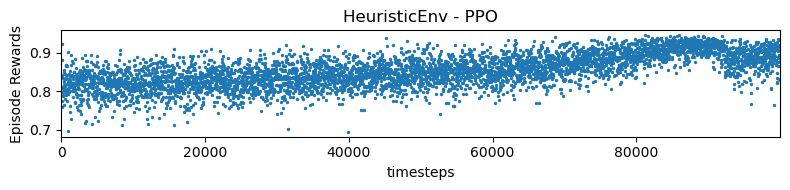

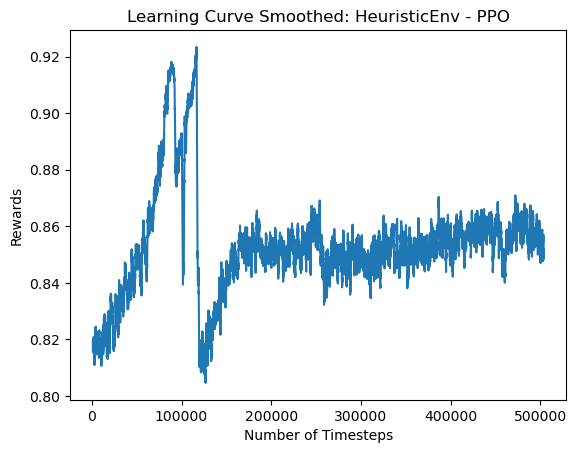

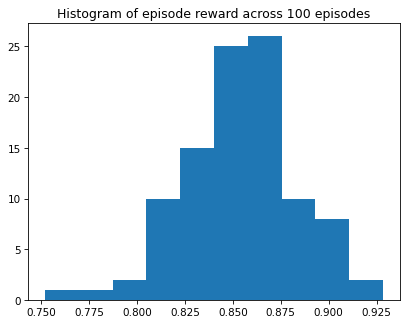

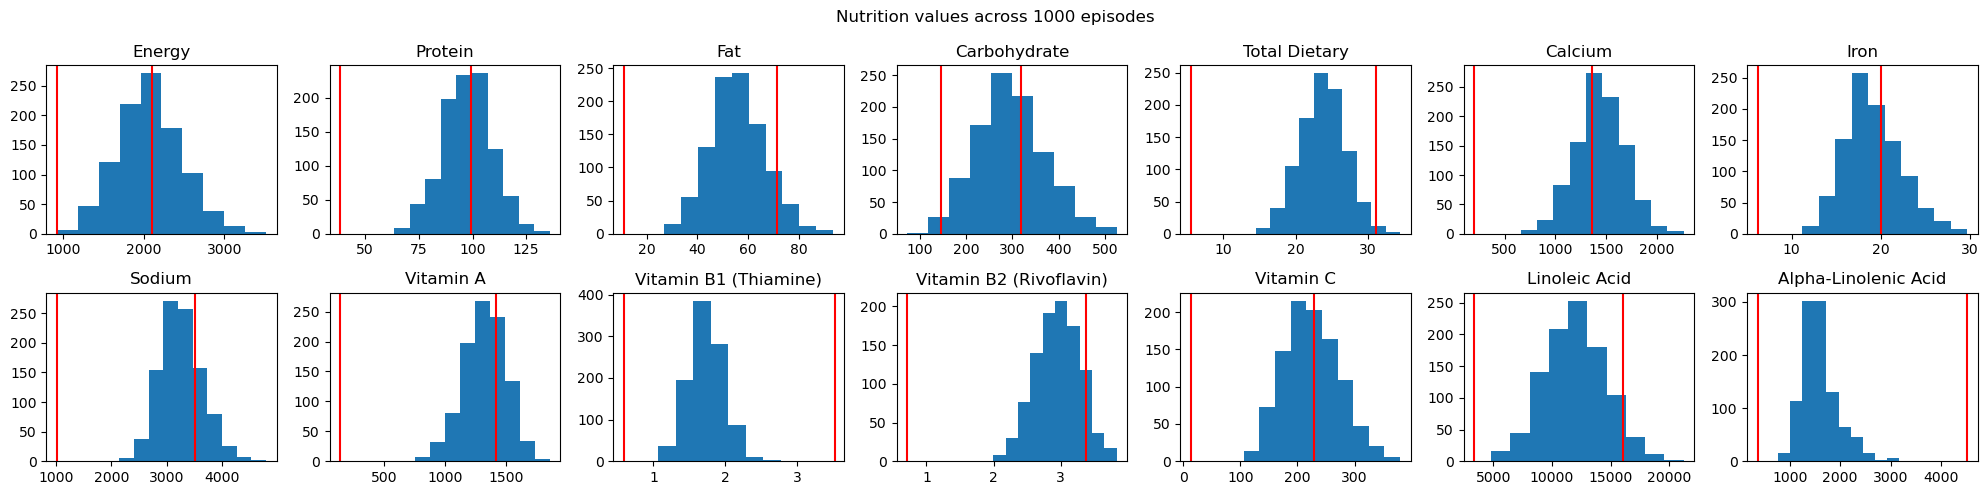

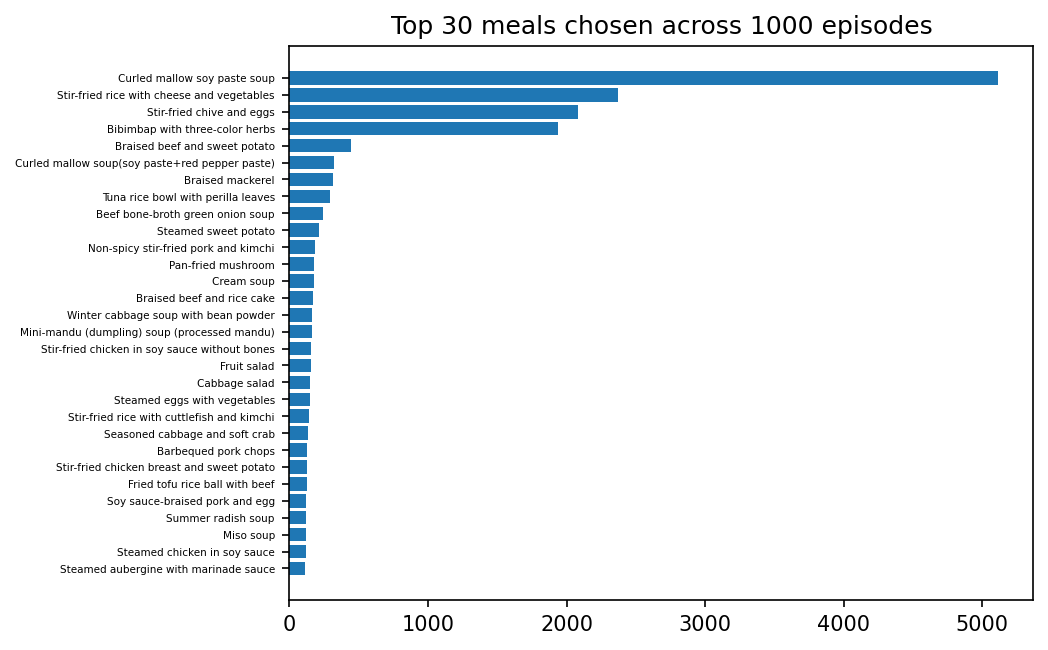

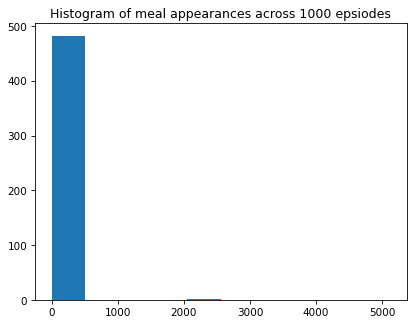

(<stable_baselines3.ppo.ppo.PPO at 0x7f83521aafd0>,
 <Monitor<HeuristicEnv instance>>)

In [5]:
model = PPO
num_steps = 500000
log_dir = f"./tmp/gym/{time.strftime('%Y%m%d-%H%M%S')}"
log_dir += f'_heuristic_env_{model.__name__},' + str(heuristic_env.reward_weights).replace(': ', '=') + f',num_steps={num_steps}'
os.makedirs(log_dir, exist_ok=False)
print(f'Output stored at: {log_dir}')
run_with_learning_algorithm(model, heuristic_env, num_steps, log_dir, num_meals=21, seed=0)

Output stored at: ./tmp/gym/20230425-002839_heuristic_env_DQN,{'coef_nutrition_lower'=1, 'coef_nutrition_upper'=-0.5, 'coef_sequence_entropy'=0, 'coef_repetitions'=0, 'coef_overall_entropy'=0, 'coef_carbon'=0},num_steps=500000
Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: Braised dried cuttlefish and chilli pepper in soy sauce
Chosen Meal Category: Braised
Meal History: ['Soft crab yuzu salad' 'Soft crab yuzu salad' 'Soft crab yuzu salad'
 'Soft crab yuzu salad' 'Soft crab yuzu salad' 'Soft crab yuzu salad'
 'Soft crab yuzu salad' 'Soft crab yuzu salad' 'Soft crab yuzu salad'
 'Soft crab yuzu salad' 'Soft crab yuzu salad' 'Soft crab yuzu salad'
 'Soft crab yuzu salad'
 'Braised dried cuttlefish and chilli pepper in soy sauce'
 'Braised dried cuttlefish and chilli pepper in soy sauce'
 'Braised dried cuttlefish and chilli pepper in soy sauce'
 'Soft crab yuzu salad'
 'Braised dried cuttlefish and chilli pepper in soy sauce'
 'Braised dried cut

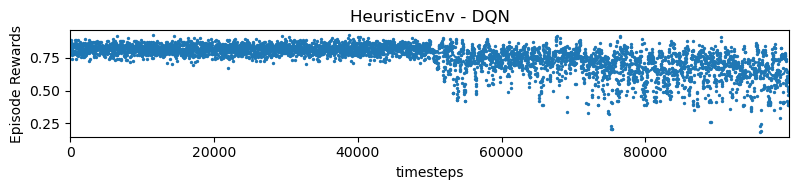

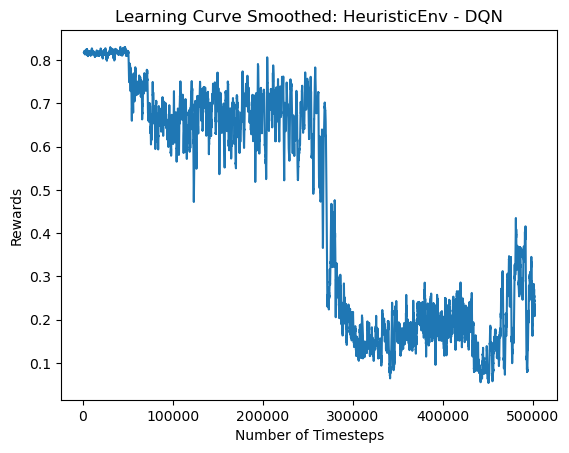

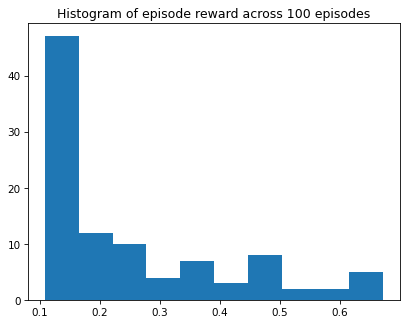

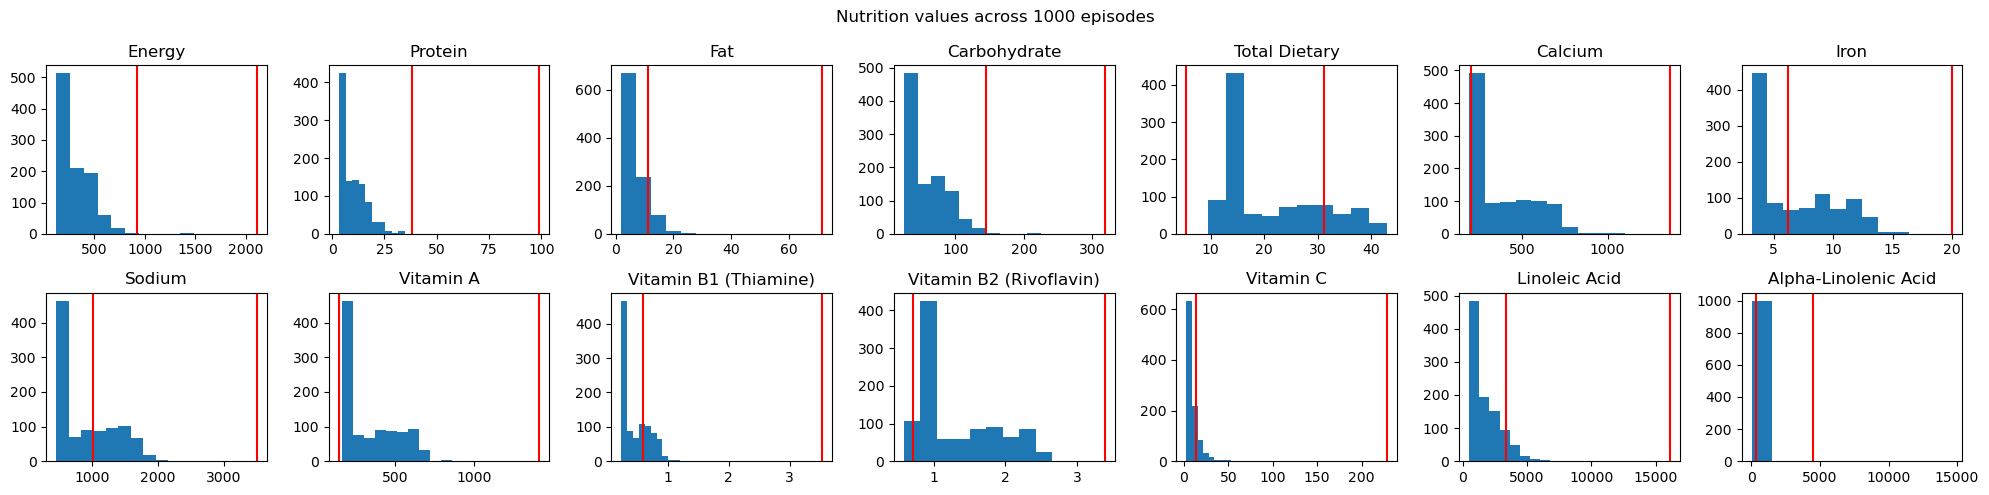

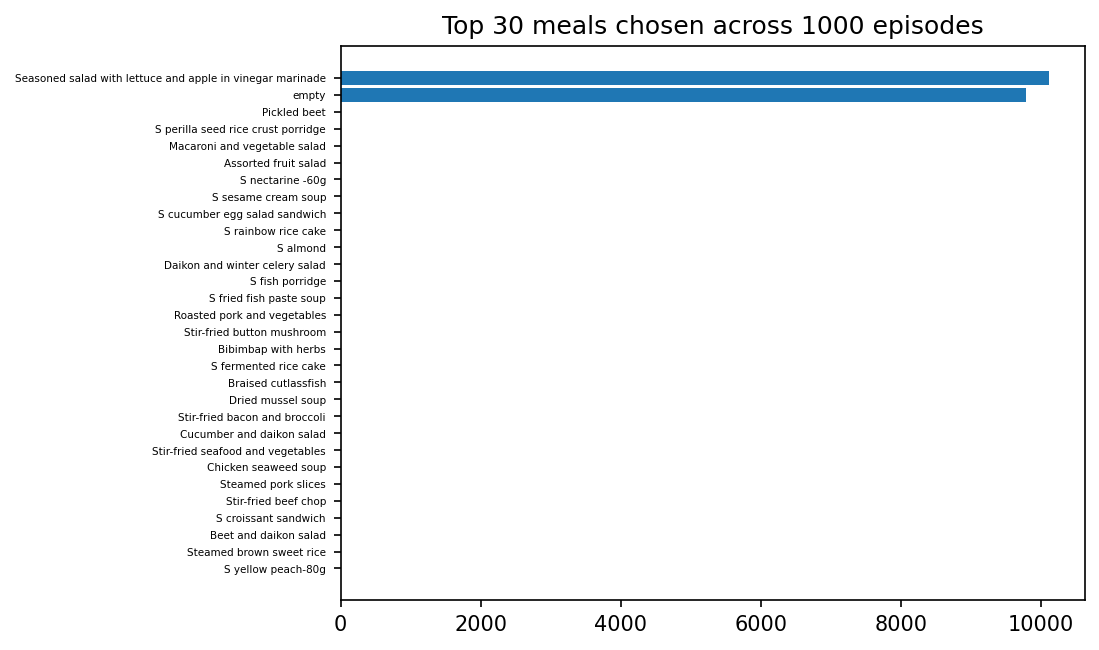

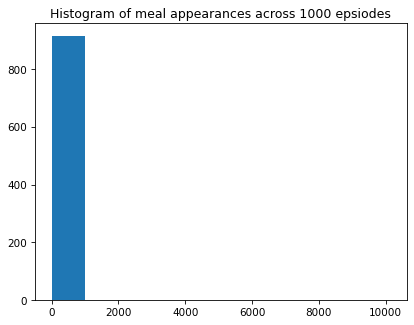

(<stable_baselines3.dqn.dqn.DQN at 0x7f8320e1be50>,
 <Monitor<HeuristicEnv instance>>)

In [6]:
model = DQN
num_steps = 500000
log_dir = f"./tmp/gym/{time.strftime('%Y%m%d-%H%M%S')}"
log_dir += f'_heuristic_env_{model.__name__},' + str(heuristic_env.reward_weights).replace(': ', '=') + f',num_steps={num_steps}'
os.makedirs(log_dir, exist_ok=False)
print(f'Output stored at: {log_dir}')
run_with_learning_algorithm(model, heuristic_env, num_steps, log_dir, num_meals=21, seed=0)

Output stored at: ./tmp/gym/20230425-010350_heuristic_env_A2C,{'coef_nutrition_lower'=1, 'coef_nutrition_upper'=-0.5, 'coef_sequence_entropy'=0, 'coef_repetitions'=0, 'coef_overall_entropy'=0, 'coef_carbon'=0},num_steps=500000
Using cpu device
Wrapping the env in a DummyVecEnv.
Initial Results
Step: 21
Chosen Meal: Stir-fried oyster mushroom and onion
Chosen Meal Category: Stir-fried
Meal History: ['Steamed octopus with rice cake' 'S cheese stick'
 'Seasoned salad with konjac and kimchi'
 'Shrimp vegetable fried rice made with oyster sauce'
 'S royal-style tteokbokki (stir-fried rice cake)'
 'S spinach spread white bread pizza'
 'Freshwater snail soy paste soup (freshwater snail soup)'
 'Deep-fried brown kelp'
 'Udon (white wheat noodles) with stir-fried smoked duck'
 'Barbequed beef rice bowl with fried tofu' 'Big dumpling soup'
 'S yangsongyi mushroom cheese porridge' 'S tofu porridge'
 'Braised atka mackerel in sweet soy sauce' 'S boiled sweet potato'
 'Rolled omelette with shrimp' 

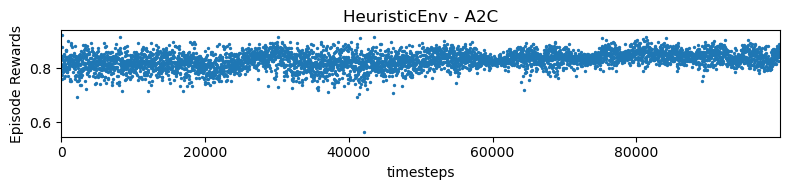

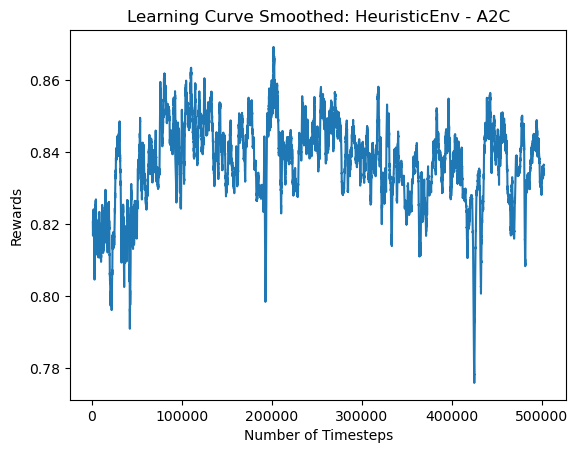

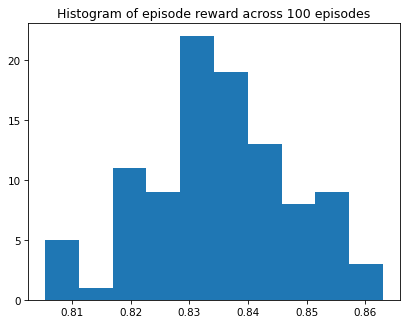

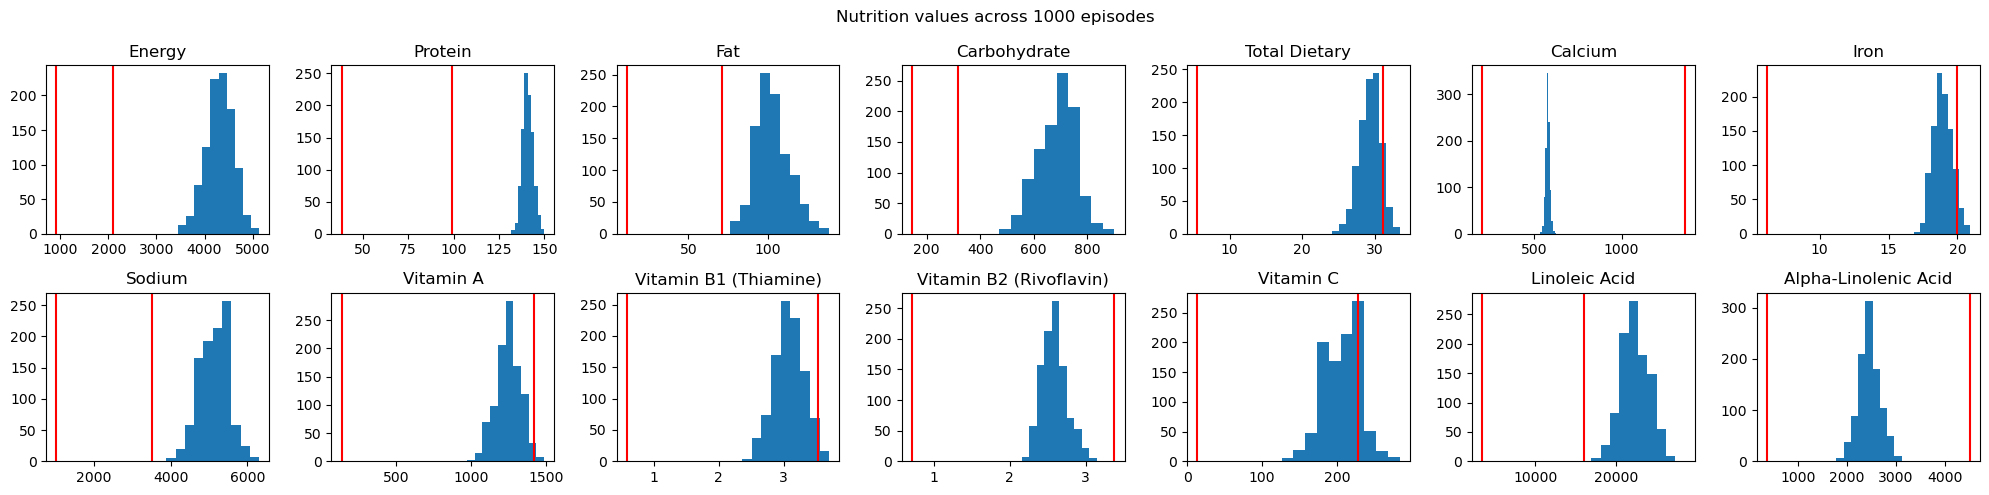

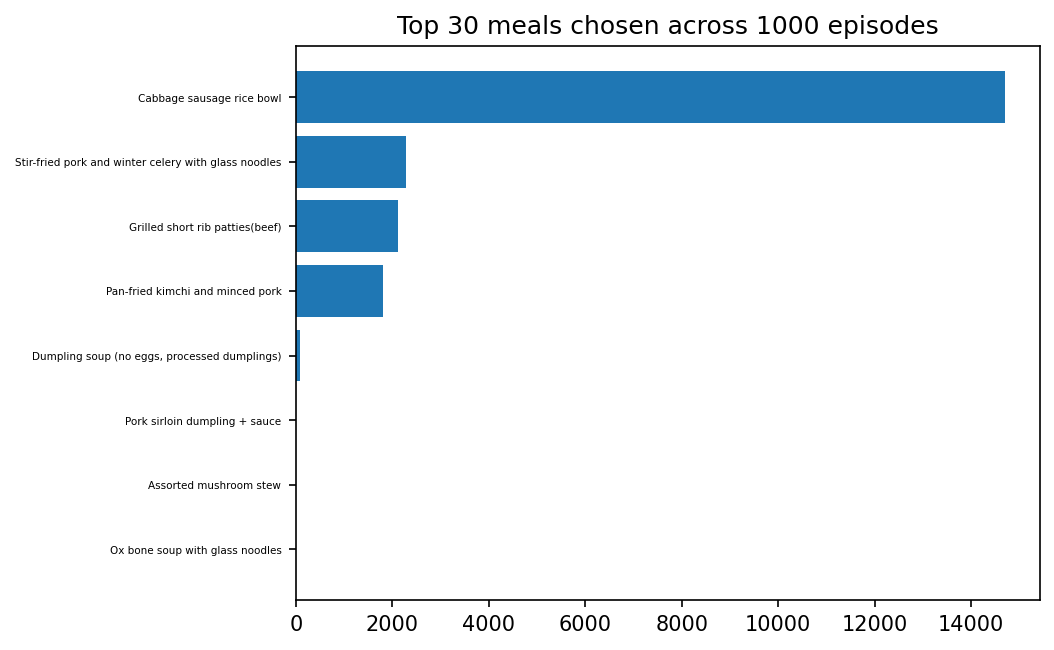

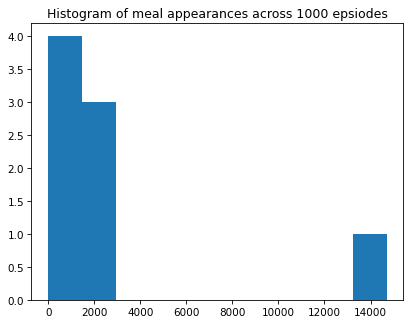

(<stable_baselines3.a2c.a2c.A2C at 0x7f82d8932790>,
 <Monitor<HeuristicEnv instance>>)

In [7]:
model = A2C
num_steps = 500000
log_dir = f"./tmp/gym/{time.strftime('%Y%m%d-%H%M%S')}"
log_dir += f'_heuristic_env_{model.__name__},' + str(heuristic_env.reward_weights).replace(': ', '=') + f',num_steps={num_steps}'
os.makedirs(log_dir, exist_ok=False)
print(f'Output stored at: {log_dir}')
run_with_learning_algorithm(model, heuristic_env, num_steps, log_dir, num_meals=21, seed=0)